# Importing the usual libraries

In [1]:
# importing the usual libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

# importing the dataset

In [2]:
# importing the dataset
data = pd.read_csv('data.csv')
X = data.iloc[:,1:4].values
y = data.iloc[:,4].values

In [4]:
y

array([10., 10., 10., ...,  5.,  5.,  5.])

# Preprocessing dependent variables

In [5]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)

In [6]:
y

array([2, 2, 2, ..., 1, 1, 1], dtype=int64)

# train, test, split

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Preprocessing indepedent variables
the X_test data were standardized using the scale based on the training data

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [9]:
# important to convert to onehot encoded 
y_train = tf.keras.utils.to_categorical(y_train)

In [10]:
print(X_train, y_train)

[[ 0.2255859   0.8659291   0.13797995]
 [-0.06609719  0.01603529 -0.03040114]
 [-0.24839913 -0.41994386 -0.17177396]
 ...
 [-0.0952655  -0.40055828 -0.07558379]
 [ 1.29022919 -0.94577188  0.57035768]
 [ 1.18084803 -0.79543305  0.51802147]] [[0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 ...
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]]


In [11]:
# important to convert to onehot encoded 
y_test = tf.keras.utils.to_categorical(y_test)

In [12]:
print(X_test, y_test)

[[-0.29944367  0.5940899  -0.17313633]
 [-0.26298328 -0.07163127 -0.15512979]
 [-0.22652289  1.33465022 -0.10386737]
 ...
 [ 0.23287798 -1.15958117  0.04105059]
 [-0.2556912  -0.44248332 -0.16240613]
 [-0.21923082 -0.11270051 -0.14028172]] [[0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]]


# ANN

In [13]:
import tensorflow as tf

In [26]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=12, activation='relu'))
ann.add(tf.keras.layers.Dense(units=24, activation='relu'))
ann.add(tf.keras.layers.Dense(units=5, activation='softmax'))
ann.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [29]:
ann.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 6)                 24        
_________________________________________________________________
dense_7 (Dense)              (None, 12)                84        
_________________________________________________________________
dense_8 (Dense)              (None, 24)                312       
_________________________________________________________________
dense_9 (Dense)              (None, 5)                 125       
Total params: 545
Trainable params: 545
Non-trainable params: 0
_________________________________________________________________


In [28]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
180/180 [==============================] - 0s 682us/step - loss: 1.2136 - accuracy: 0.5767
Epoch 2/100
180/180 [==============================] - 0s 638us/step - loss: 0.8276 - accuracy: 0.7197
Epoch 3/100
180/180 [==============================] - 0s 649us/step - loss: 0.7308 - accuracy: 0.7602
Epoch 4/100
180/180 [==============================] - 0s 640us/step - loss: 0.7007 - accuracy: 0.7677
Epoch 5/100
180/180 [==============================] - 0s 699us/step - loss: 0.6792 - accuracy: 0.7713
Epoch 6/100
180/180 [==============================] - 0s 675us/step - loss: 0.6631 - accuracy: 0.7755
Epoch 7/100
180/180 [==============================] - 0s 731us/step - loss: 0.6485 - accuracy: 0.7776
Epoch 8/100
180/180 [==============================] - 0s 816us/step - loss: 0.6388 - accuracy: 0.7764
Epoch 9/100
180/180 [==============================] - 0s 696us/step - loss: 0.6293 - accuracy: 0.7793
Epoch 10/100
180/180 [==============================] - 0s 649us/step - l

180/180 [==============================] - 0s 757us/step - loss: 0.5110 - accuracy: 0.8291
Epoch 80/100
180/180 [==============================] - 0s 653us/step - loss: 0.5110 - accuracy: 0.8300
Epoch 81/100
180/180 [==============================] - 0s 607us/step - loss: 0.5097 - accuracy: 0.8262
Epoch 82/100
180/180 [==============================] - 0s 749us/step - loss: 0.5082 - accuracy: 0.8283
Epoch 83/100
180/180 [==============================] - 0s 719us/step - loss: 0.5097 - accuracy: 0.8293
Epoch 84/100
180/180 [==============================] - 0s 732us/step - loss: 0.5070 - accuracy: 0.8307
Epoch 85/100
180/180 [==============================] - 0s 719us/step - loss: 0.5081 - accuracy: 0.8302
Epoch 86/100
180/180 [==============================] - 0s 695us/step - loss: 0.5081 - accuracy: 0.8312
Epoch 87/100
180/180 [==============================] - 0s 756us/step - loss: 0.5088 - accuracy: 0.8290
Epoch 88/100
180/180 [==============================] - 0s 746us/step - loss:

In [31]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
y_pred

array([[False,  True, False, False, False],
       [False,  True, False, False, False],
       [False, False, False, False, False],
       ...,
       [False, False,  True, False, False],
       [False,  True, False, False, False],
       [False,  True, False, False, False]])

In [33]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
print(cm)
accuracy_score(y_test, y_pred)

[[  16    8   13    0    0]
 [  36 1053   13    2    0]
 [  70   64  110    1    0]
 [  44   18   17  164   27]
 [  28    9   14   78  135]]


0.765625

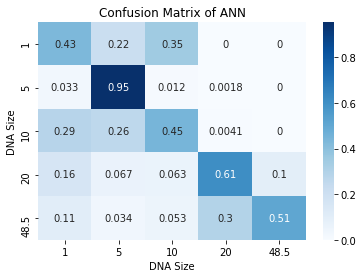

In [50]:
import seaborn as sn
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
ax = sn.heatmap(cm, annot=True,  cmap="Blues")
ax.set_xticklabels(['1','5','10','20','48.5'])
ax.set_yticklabels(['1','5','10','20','48.5'])
ax.set_xlabel('DNA Size')
ax.set_ylabel('DNA Size')
ax.set_title('Confusion Matrix of ANN')
plt.savefig('ANN.png', dpi=500)